<a href="https://colab.research.google.com/github/YOUNGitacina/Data-mining-course/blob/main/DataUnd/Du_class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding 

using the tips data

Goal:

    Make visualization
    Fix problem in data:
        missing values, Outliers, Duplicate records
    Ready to proceed clusting... 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats.stats import pearsonr

## Loading data with pandas

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataUnd/tips-id.csv', sep='\t', index_col=0) #set correct delimiter,index column
df_age = pd.read_csv('/content/drive/MyDrive/DataUnd/age-tips.csv', sep='\t', index_col=0)
df_err = pd.read_csv('/content/drive/MyDrive/DataUnd/tips-error.csv')

In [ ]:
print(df.head())
print()
print(df.tail())

    total_bill   tip     sex smoker  day    time  size
ID                                                    
1        16.99  1.01  Female    NaN  Sun  Dinner     2
2        10.34  1.66    Male     No  Sun  Dinner     3
3        21.01  3.50    Male     No  Sun  Dinner     3
4        23.68  3.31    Male     No  Sun  Dinner     2
5        24.59  3.61  Female     No  Sun  Dinner     4

     total_bill   tip     sex smoker   day    time  size
ID                                                      
240       29.03  5.92    Male     No   Sat  Dinner     3
241       27.18  2.00  Female    Yes   Sat  Dinner     2
242       22.67  2.00    Male    Yes   Sat  Dinner     2
243       17.82  1.75    Male     No   Sat  Dinner     2
244       18.78  3.00  Female     No  Thur  Dinner     2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 244 entries, 1 to 244
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      242 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 15.2+ KB


Comment:
1.pandas dataframe

object and float

In [ ]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [ ]:
df_age

,age,gender
ID,,
1,57,Female
2,23,Male
3,62,Male
4,0,Male
5,0,Female
...,...,...
240,25,Male
241,42,Female
242,64,Male


In [ ]:
join_df = df.join(df_age, on='ID') #need to set index_col = 0 for df_age

In [ ]:
join_df.drop(columns=['gender'], inplace=True)

#analyse the context to pick missing value
e.g. nan ,0

In [ ]:

df_err.head()

,total_bill,tip,sex,smoker,day,time,size
0,aaaaa,NaN,Female,No,Sun,Dinner,2
1,10.34,1.66,NaN,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
df_err.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    object 
 1   tip         243 non-null    float64
 2   sex         243 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 13.5+ KB


object for totalbill
missing value for tip and sex
in big data, we need infer
replace with a dummy val

In [ ]:
df_err['total_bill'].replace({'aaaaa':0, 'bbbbb':0}, inplace=True)

In [ ]:
df_err.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,0,NaN,Female,No,Sun,Dinner,2
1,10.34,1.66,NaN,No,Sun,Dinner,3


In [ ]:
join_df.describe() #only numerical

,total_bill,tip,size,age
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,45.180328
std,8.902412,1.383638,0.951100,23.399031
min,3.070000,1.000000,1.000000,0.000000
25%,13.347500,2.000000,2.000000,25.000000
50%,17.795000,2.900000,2.000000,44.000000
75%,24.127500,3.562500,3.000000,67.000000
max,50.810000,10.000000,6.000000,80.000000


In [ ]:
df_err['total_bill'].dtype(float) #detect the type float in one column

TypeError: ignored

## For catagrical data use mode()

In [ ]:
join_df['sex'].mode()

0    Male
dtype: object

In [ ]:
join_df.sex.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
join_df.smoker.unique()

array([nan, 'No', 'Yes'], dtype=object)

In [ ]:
join_df.day.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
join_df.time.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [ ]:
join_df.isnull().any()

total_bill    False
tip           False
sex           False
smoker         True
day           False
time          False
size          False
age           False
dtype: bool

In [ ]:
join_df['total_bill'].corr(join_df['tip'])

0.6757341092113641

## correlation

In [ ]:
join_df.corr()

,total_bill,tip,size,age
total_bill,1.000000,0.675734,0.598315,-0.001798
tip,0.675734,1.000000,0.489299,-0.093627
size,0.598315,0.489299,1.000000,-0.036070
age,-0.001798,-0.093627,-0.036070,1.000000


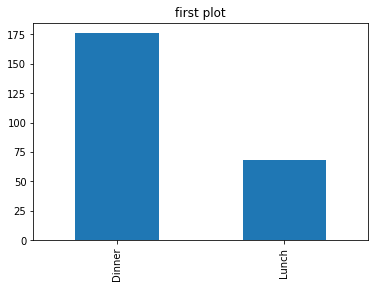

In [ ]:
join_df['time'].value_counts().plot(kind='bar', title='first plot')
plt.show()
#also save i .jpg

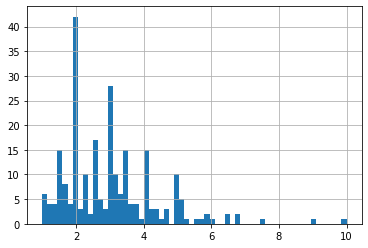

In [48]:
join_df['tip'].hist(bins=60)
plt.show()
#distribution for all var

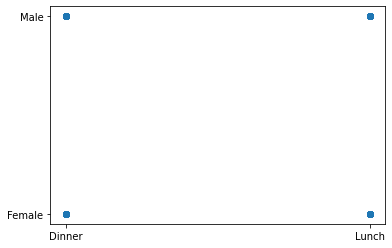

In [50]:
plt.scatter(join_df['time'], join_df['sex'])
plt.show()

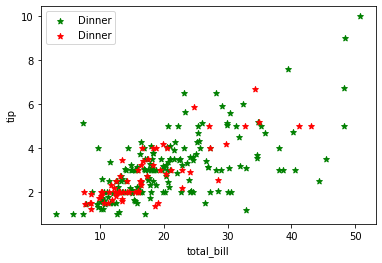

In [53]:
plt.scatter(join_df[join_df['time']=='Dinner']['total_bill'],
            join_df[join_df['time']=='Dinner']['tip'], color='g', marker='*',label='Dinner')

plt.scatter(join_df[join_df['time']=='Lunch']['total_bill'],
            join_df[join_df['time']=='Lunch']['tip'], color='r', marker='*',label='Dinner')            


plt.xlabel('total_bill')
plt.ylabel('tip')
plt.legend()
plt.show()
#same trend,higher tips for dinner

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4e9491afd0>,
      dtype=object)

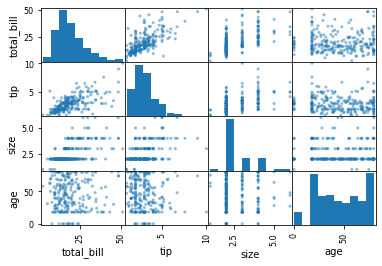

In [54]:
pd.plotting.scatter_matrix(join_df[['total_bill', 'tip', 'size', 'age']])

In [55]:
join_df[join_df['smoker'].isnull()]

,total_bill,tip,sex,smoker,day,time,size,age
ID,,,,,,,,
1,16.99,1.01,Female,NaN,Sun,Dinner,2,57
41,16.04,2.24,Male,NaN,Sat,Dinner,3,44


In [57]:
join_df[join_df['sex']=='Male']['smoker'].mode()

0    No
dtype: object

In [59]:
join_df[join_df['sex']=='Female']['smoker'].mode()

0    No
dtype: object

## fillna

In [61]:
join_df['smoker'].fillna(join_df['smoker'].mode()[0]) #fillna with smoker's mode i.e.: NO

ID
1       No
2       No
3       No
4       No
5       No
      ... 
240     No
241    Yes
242    Yes
243     No
244     No
Name: smoker, Length: 244, dtype: object

In [63]:
join_df['smoker'].mode()[0]

'No'